**Lab 1**

Q1- Use same method that explain in lecture to show first 6 elements of the dataset. <br>
Solution: In Line 
<br>
<br>
Q2- Normalize the data by dividing the values by 255. Next step is to design the model. For this part we use only one hidden layer with 128 nodes on it. <br>
Solution: loss: 0.4079 - accuracy: 0.8909 
<br>
<br>
Q3- Add another layer with 128 nodes, increase the epochs to 10 and report the result. How much is the accuracy? (model.evaluate can tell you the accuracy). <br>
Solution: loss: 0.3914 - accuracy: 0.8949 
<br>
<br>
Q4- Now train the model again with adding stochastic gradient descent with batch size of 200. What do you expect to be changed? Speed or accuracy? <br>
Solution: We get increased speed <br>
          loss: 0.4711 - accuracy: 0.8743 
<br>
<br>
Q5- Design a neural network with 2 hidden layers (hidden layer 1 with 12 nodes and hidden layer 2 with 8 nodes), report the accuracy and draw the learning curves. Apply a dropout to see if you could get any better result. Use ‘adam’ as optimizer. <br>
Solution: No significant increae in accuracy <br>
 20 Epoch; No Dropout = [loss = 0.7869, accuracy = 0.6429] <br>
 50 Epoch; No Dropout = [loss = 0.6528, accuracy = 0.6169] <br>
500 Epoch; No Dropout = [loss = 0.6253, accuracy = 0.6688] <br>
 20 Epoch; \w Dropout = [loss = 0.7609, accuracy = 0.6429] <br>
 50 Epoch; \w Dropout = [loss = 0.7609, accuracy = 0.6429] <br>
500 Epoch; \w Dropout = [loss = 0.7609, accuracy = 0.6429] 

In [46]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from sklearn.model_selection import train_test_split

In [47]:
# Introduction to Tensorflow
hello = tf.constant("Hello, Tensorflow")
print(hello)

tf.Tensor(b'Hello, Tensorflow', shape=(), dtype=string)


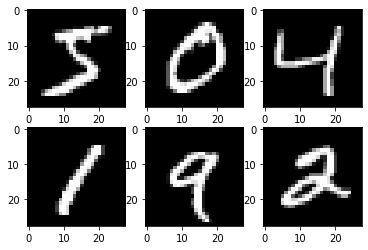

In [48]:
"""
Q1- Use same method that explain in lecture to show first 6 elements of the dataset. You should see:
"""

mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
for i in range(0, 6):
    plt.subplot(2,3, i+1)
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
plt.show()

In [49]:
"""
Q2- Normalize the data by dividing the values by 255.
Next step is to design the model. For this part we use only one hidden layer with 128 nodes on it.
"""
X_train, X_test = X_train/255.0, X_test/255.0
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='sigmoid'),
    tf.keras.layers.Dense(10)
])
predictions = model(X_train[:1]).numpy()
# print(predictions)
# print(tf.nn.sigmoid(predictions).numpy())
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
# loss_fn(y_train[:1], predictions).numpy()
model.compile(
    optimizer='SGD',
    loss = loss_fn,
    metrics=['accuracy']
)
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.4099 - accuracy: 0.7209
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6866 - accuracy: 0.8500: 1s - loss: 0.7623 - accuracy:  - ETA: 0s
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5174 - accuracy: 0.8730: 0s - loss: 0
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4455 - accuracy: 0.8849
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4052 - accuracy: 0.8909: 0s - loss: 0.4052 - accuracy: 0.89


In [50]:
"""
Q3- Add another layer with 128 nodes, increase the epochs to 10 and report the result. How much is the accuracy? (model.evaluate can tell you the accuracy).
"""
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=True
)
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='sigmoid'),
    tf.keras.layers.Dense(128, activation='sigmoid'),
    tf.keras.layers.Dense(10)
])
model.compile(optimizer='SGD', loss = loss_fn, metrics=['accuracy'])
hist = model.fit(X_train, y_train, validation_split=0.2, epochs=10)
model.evaluate(X_test, y_test, verbose=2)

Epoch 1/10
1500/1500 [==============================] - 5s 3ms/step - loss: 2.2357 - accuracy: 0.2951 - val_loss: 2.1369 - val_accuracy: 0.5207
Epoch 2/10
1500/1500 [==============================] - 4s 3ms/step - loss: 1.9367 - accuracy: 0.5804 - val_loss: 1.6459 - val_accuracy: 0.6407
Epoch 3/10
1500/1500 [==============================] - 4s 3ms/step - loss: 1.3436 - accuracy: 0.6948 - val_loss: 1.0647 - val_accuracy: 0.7482
Epoch 4/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.9329 - accuracy: 0.7726 - val_loss: 0.7833 - val_accuracy: 0.8148
Epoch 5/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.7297 - accuracy: 0.8182 - val_loss: 0.6320 - val_accuracy: 0.8474
Epoch 6/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.6112 - accuracy: 0.8429 - val_loss: 0.5391 - val_accuracy: 0.8656
Epoch 7/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.5357 - accuracy: 0.8594 - val_loss: 0.4795 - val_accuracy:

[0.391878217458725, 0.8920999765396118]

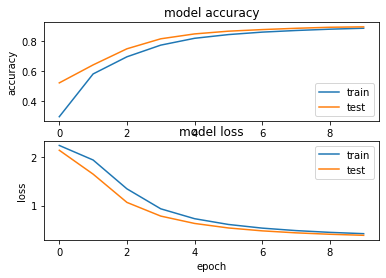

In [51]:
plt.subplot(2,1,1) 
plt.plot(hist.history['accuracy']) 
plt.plot(hist.history['val_accuracy']) 
plt.title('model accuracy') 
plt.ylabel('accuracy') 
plt.xlabel('epoch') 
plt.legend(['train', 'test'], loc='lower right') 

plt.subplot(2,1,2) 
plt.plot(hist.history['loss']) 
plt.plot(hist.history['val_loss']) 
plt.title('model loss') 
plt.ylabel('loss') 
plt.xlabel('epoch') 
plt.legend(['train', 'test'], loc='upper right') 

plt.show()

In [52]:
"""
Q4- Now train the model again with adding stochastic gradient descent with batch size of 200. What do you expect to be changed? Speed or accuracy?
"""
model = tf.keras.models.Sequential([ 
    tf.keras.layers.Flatten(input_shape=(28, 28)), 
    tf.keras.layers.Dense(128, activation='sigmoid'), 
    tf.keras.layers.Dense(128, activation='sigmoid'), 
    # tf.keras.layers.Dropout(0.2), 
    tf.keras.layers.Dense(10)
])
model.compile(optimizer='SGD', loss=loss_fn, metrics=['accuracy'])
model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=200)

Epoch 1/50
240/240 [==============================] - 1s 5ms/step - loss: 2.2932 - accuracy: 0.1349 - val_loss: 2.2772 - val_accuracy: 0.2612
Epoch 2/50
240/240 [==============================] - 1s 4ms/step - loss: 2.2663 - accuracy: 0.1900 - val_loss: 2.2552 - val_accuracy: 0.2228
Epoch 3/50
240/240 [==============================] - 1s 4ms/step - loss: 2.2437 - accuracy: 0.2583 - val_loss: 2.2308 - val_accuracy: 0.3011
Epoch 4/50
240/240 [==============================] - 1s 4ms/step - loss: 2.2180 - accuracy: 0.3414 - val_loss: 2.2028 - val_accuracy: 0.3491 loss: 2.2251 
Epoch 5/50
240/240 [==============================] - ETA: 0s - loss: 2.1884 - accuracy: 0.40 - 1s 4ms/step - loss: 2.1881 - accuracy: 0.4081 - val_loss: 2.1699 - val_accuracy: 0.4754
Epoch 6/50
240/240 [==============================] - 1s 4ms/step - loss: 2.1523 - accuracy: 0.4639 - val_loss: 2.1298 - val_accuracy: 0.4874
Epoch 7/50
240/240 [==============================] - 1s 4ms/step - loss: 2.1086 - accuracy:

In [53]:
"""
Q5- Design a neural network with 2 hidden layers (hidden layer 1 with 12 nodes and hidden layer 2 with 8 nodes), report the accuracy and draw the learning curves. Apply a dropout to see if you could get any better result. Use ‘adam’ as optimizer.
We don’t expect a good accuracy from this example. That is one of the issues with NN. We need more data to create an accurate model.
"""
dataframe = pd.read_csv(f"{os.getcwd()}\\pima-indians-diabetes.csv")
# dataframe.head()
# dataframe.describe()
y = dataframe['diabete'].to_numpy()
X = dataframe.drop(['ID', 'diabete'], axis=1).to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1234)

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model = tf.keras.models.Sequential([
    # tf.keras.layers.Flatten(input_shape=(None, 8)),
    tf.keras.layers.Dense(12, activation='sigmoid'),
    tf.keras.layers.Dense(8, activation='sigmoid'),
    # tf.keras.layers.Dropout(0.2), 
    tf.keras.layers.Dense(10)
])

model2 = tf.keras.models.Sequential([
    # tf.keras.layers.Flatten(input_shape=(None, 8)),
    tf.keras.layers.Dense(12, activation='sigmoid'),
    tf.keras.layers.Dense(8, activation='sigmoid'),
    tf.keras.layers.Dropout(0.2), 
    tf.keras.layers.Dense(10)
])

model.compile(optimizer='adam', loss=loss_fn, metrics=['accuracy'])
model.fit(X_train, y_train, validation_split=0.2, epochs=20)
a = model.evaluate(X_test, y_test, verbose=2)
model.fit(X_train, y_train, validation_split=0.2, epochs=50)
b = model.evaluate(X_test, y_test, verbose=2)
model.fit(X_train, y_train, validation_split=0.2, epochs=500)
c = model.evaluate(X_test, y_test, verbose=2)

model2.compile(optimizer='adam', loss=loss_fn, metrics=['accuracy'])
model2.fit(X_train, y_train, validation_split=0.2, epochs=20)
d = model2.evaluate(X_test, y_test, verbose=2)
model.fit(X_train, y_train, validation_split=0.2, epochs=50)
e = model2.evaluate(X_test, y_test, verbose=2)
model.fit(X_train, y_train, validation_split=0.2, epochs=500)
f = model2.evaluate(X_test, y_test, verbose=2)

print(f"20 Epoch; No Dropout = {a}", f"50 Epoch; No Dropout = {b}", f"500 Epoch; No Dropout = {c}")
print(f"20 Epoch; Dropout = {d}", f"50 Epoch; Dropout = {e}", f"500 Epoch; Dropout = {f}")

Epoch 1/20
16/16 [==============================] - 1s 12ms/step - loss: 2.4506 - accuracy: 0.0000e+00 - val_loss: 2.3714 - val_accuracy: 0.0000e+00
Epoch 2/20
16/16 [==============================] - 0s 4ms/step - loss: 2.2903 - accuracy: 0.0000e+00 - val_loss: 2.2111 - val_accuracy: 0.0000e+00
Epoch 3/20
16/16 [==============================] - 0s 4ms/step - loss: 2.1355 - accuracy: 0.0000e+00 - val_loss: 2.0539 - val_accuracy: 0.0000e+00
Epoch 4/20
16/16 [==============================] - 0s 4ms/step - loss: 1.9811 - accuracy: 0.0000e+00 - val_loss: 1.8997 - val_accuracy: 0.0000e+00
Epoch 5/20
16/16 [==============================] - 0s 4ms/step - loss: 1.8329 - accuracy: 0.0081 - val_loss: 1.7572 - val_accuracy: 0.1057
Epoch 6/20
16/16 [==============================] - 0s 6ms/step - loss: 1.6976 - accuracy: 0.2363 - val_loss: 1.6244 - val_accuracy: 0.5610
Epoch 7/20
16/16 [==============================] - 0s 4ms/step - loss: 1.5736 - accuracy: 0.5682 - val_loss: 1.5034 - val_accu